# house price prediction

In [1]:
import pandas as pd 
import torch 
import numpy as np 

In [2]:
df=pd.read_csv('datasets/houseprice.csv',usecols=['SalePrice','MSSubClass','MSZoning','LotFrontage','LotArea','Street','YearBuilt','LotShape','1stFlrSF','2ndFlrSF']).dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [3]:
df.isna().sum()

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
YearBuilt      0
1stFlrSF       0
2ndFlrSF       0
SalePrice      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [5]:
# choose categorical features 
for i in df.columns:
    print(f'column name {i} are unique values are {len(df[i].unique())}')

column name MSSubClass are unique values are 15
column name MSZoning are unique values are 5
column name LotFrontage are unique values are 110
column name LotArea are unique values are 869
column name Street are unique values are 2
column name LotShape are unique values are 4
column name YearBuilt are unique values are 112
column name 1stFlrSF are unique values are 678
column name 2ndFlrSF are unique values are 368
column name SalePrice are unique values are 597


In [6]:
import datetime
datetime.datetime.now().year

2025

In [7]:
df['today year']=datetime.datetime.now().year-df['YearBuilt']
df.drop('YearBuilt',axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,today year
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,22
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,49
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,24
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,110
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,25


In [8]:
# split between categorical and contineous features
cat_features=['MSSubClass','MSZoning','Street','LotShape']
out_feature='SalePrice' 

In [9]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [10]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders['MSSubClass']=LabelEncoder()
lbl_encoders['MSSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [11]:
# create a fucction for label encoding 
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,today year
0,5,3,65.0,8450,1,3,856,854,208500,22
1,0,3,80.0,9600,1,3,1262,0,181500,49
2,5,3,68.0,11250,1,0,920,866,223500,24
3,6,3,60.0,9550,1,0,961,756,140000,110
4,5,3,84.0,14260,1,0,1145,1053,250000,25


In [13]:
# stackinh and coverting into tensors 
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [14]:
# convert numpy to tensors 
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [15]:
# continous variables 
cont_features=[]
for i in df.columns:
    if i in ['MSSubClass','MSZoning','Street','LotShape','SalePrice']:
        pass 
    else:
        cont_features.append(i)
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'today year']

In [16]:
# stacking continuous varaibles to a tensor 
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [17]:
# dependent features 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [18]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

# embeddings size for categorical columns 

In [19]:
# embeddings layers to decide output based on input 
cat_dim=[len(df[col].unique()) for col in ['MSSubClass','MSZoning','Street','LotShape']]
cat_dim

[15, 5, 2, 4]

In [20]:
### thunb rule what dimension output shoud be set based on the input dimension 
embedding_dim=[(x,min(50,(x+1)//2)) for x in cat_dim]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [21]:
# embedding layers to pytorch 
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [22]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [23]:
embedding_val=[]
for i,e, in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
embedding_val

[tensor([[ 0.7083, -0.4507,  0.8825,  ..., -0.8468,  1.0177, -0.4296],
         [-1.2092, -1.3831, -0.0635,  ..., -0.5430, -1.3477, -0.8456],
         [ 0.7083, -0.4507,  0.8825,  ..., -0.8468,  1.0177, -0.4296],
         ...,
         [-0.7929,  0.9918,  1.4041,  ..., -0.2628, -1.6985,  1.2523],
         [-1.2092, -1.3831, -0.0635,  ..., -0.5430, -1.3477, -0.8456],
         [-1.2092, -1.3831, -0.0635,  ..., -0.5430, -1.3477, -0.8456]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3586, -1.1876, -0.3165],
         [-0.3586, -1.1876, -0.3165],
         [-0.3586, -1.1876, -0.3165],
         ...,
         [-0.3586, -1.1876, -0.3165],
         [-0.3586, -1.1876, -0.3165],
         [-0.3586, -1.1876, -0.3165]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.3990],
         [0.3990],
         [0.3990],
         ...,
         [0.3990],
         [0.3990],
         [0.3990]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.1301,  0.6004],
         [-0.1301,  0.6004],
         [ 0.2386,  1.8432],

In [24]:
z=torch.cat(embedding_val,1)
z 

tensor([[ 0.7083, -0.4507,  0.8825,  ...,  0.3990, -0.1301,  0.6004],
        [-1.2092, -1.3831, -0.0635,  ...,  0.3990, -0.1301,  0.6004],
        [ 0.7083, -0.4507,  0.8825,  ...,  0.3990,  0.2386,  1.8432],
        ...,
        [-0.7929,  0.9918,  1.4041,  ...,  0.3990, -0.1301,  0.6004],
        [-1.2092, -1.3831, -0.0635,  ...,  0.3990, -0.1301,  0.6004],
        [-1.2092, -1.3831, -0.0635,  ...,  0.3990, -0.1301,  0.6004]],
       grad_fn=<CatBackward0>)

In [25]:
# implement dropout 
dropout=nn.Dropout(0.4)
final_embed=dropout(z)
final_embed

tensor([[ 0.0000, -0.7512,  0.0000,  ...,  0.6649, -0.0000,  1.0007],
        [-0.0000, -0.0000, -0.1058,  ...,  0.6649, -0.0000,  1.0007],
        [ 1.1806, -0.7512,  1.4708,  ...,  0.6649,  0.0000,  0.0000],
        ...,
        [-1.3216,  0.0000,  0.0000,  ...,  0.0000, -0.0000,  0.0000],
        [-0.0000, -2.3052, -0.0000,  ...,  0.6649, -0.0000,  1.0007],
        [-2.0153, -2.3052, -0.1058,  ...,  0.0000, -0.2169,  1.0007]],
       grad_fn=<MulBackward0>)

In [26]:
## create a neural network 
import torch
import torch.nn as nn 
import torch.nn.functional as F 

class FeedForwardNN(nn.Module):

    def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)

        layerlist=[]
        n_emb=sum((out for inp,out in embedding_dim))
        n_in=n_emb+n_cont 

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in=i 
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers=nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embeddings=[]
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x=torch.cat(embeddings,1)
        x=self.emb_drop(x)
        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x 

In [27]:
len(cont_features)

5

In [28]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [29]:
# define loss and optimizer
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [30]:
df.shape

(1201, 10)

In [31]:
cont_values, cont_values.shape

(tensor([[   65.,  8450.,   856.,   854.,    22.],
         [   80.,  9600.,  1262.,     0.,    49.],
         [   68., 11250.,   920.,   866.,    24.],
         ...,
         [   66.,  9042.,  1188.,  1152.,    84.],
         [   68.,  9717.,  1078.,     0.,    75.],
         [   75.,  9937.,  1256.,     0.,    60.]]),
 torch.Size([1201, 5]))

In [32]:
# train test split 
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
ytrain=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [33]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(ytrain),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [34]:
# training 
epochs=5000
final_losses=[]
for i in range(epochs):
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,ytrain)) ## RMSE
    final_losses.append(loss.item())
    if i%10==1:
        print(f"Epoch number: {i} and loss {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and loss 200496.375
Epoch number: 11 and loss 200493.171875
Epoch number: 21 and loss 200488.640625
Epoch number: 31 and loss 200481.6875
Epoch number: 41 and loss 200472.59375
Epoch number: 51 and loss 200460.25
Epoch number: 61 and loss 200445.0
Epoch number: 71 and loss 200426.75
Epoch number: 81 and loss 200406.453125
Epoch number: 91 and loss 200379.34375
Epoch number: 101 and loss 200351.796875
Epoch number: 111 and loss 200319.15625
Epoch number: 121 and loss 200286.609375
Epoch number: 131 and loss 200244.5
Epoch number: 141 and loss 200205.640625
Epoch number: 151 and loss 200158.96875
Epoch number: 161 and loss 200108.25
Epoch number: 171 and loss 200058.359375
Epoch number: 181 and loss 199998.5625
Epoch number: 191 and loss 199938.578125
Epoch number: 201 and loss 199871.71875
Epoch number: 211 and loss 199806.125
Epoch number: 221 and loss 199726.484375
Epoch number: 231 and loss 199653.53125
Epoch number: 241 and loss 199581.609375
Epoch number: 251 and lo

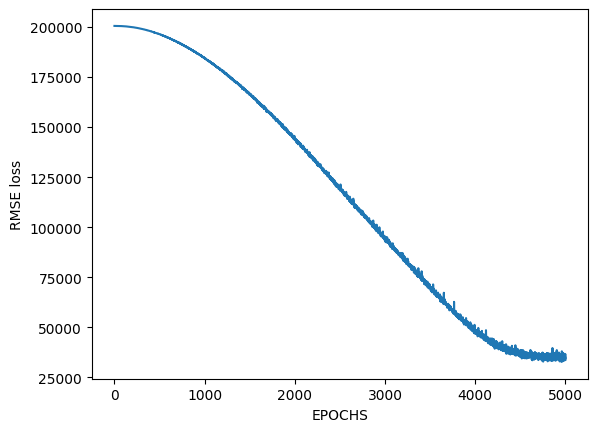

In [35]:
import matplotlib.pyplot as plt 
plt.plot(range(epochs),final_losses)
plt.ylabel('RMSE loss')
plt.xlabel('EPOCHS')
plt.show()

In [36]:
# validate the test data 
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print(f"RMSE: {loss}")

RMSE: 46648.1328125


In [41]:
data_verify=pd.DataFrame(y_test.tolist(),columns=['Test'])
data_predicted = pd.DataFrame(y_pred.tolist(),columns=['Prediction'])

In [43]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,158207.437500,-28207.437500
1,138887.0,147796.750000,-8909.750000
2,175500.0,149071.437500,26428.562500
3,195000.0,239346.234375,-44346.234375
4,142500.0,140027.312500,2472.687500


## saving and loading the model

In [46]:
torch.save(model.state_dict(),'HouseWeights.pt')
model.load_state_dict(torch.load('HouseWeights.pt'))
model.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [47]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print(f"RMSE: {loss}")

RMSE: 29434.916015625
